<a href="https://colab.research.google.com/github/ameympatil/MIT-ML/blob/main/Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DOG vs CAT Classifier

In [21]:
! pip install kaggle
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! kaggle datasets download -d salader/dogs-vs-cats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [22]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [24]:
## Genrators
import tensorflow
train_ds = tensorflow.keras.utils.image_dataset_from_directory(
    directory='/content/train/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))


validation_ds = tensorflow.keras.utils.image_dataset_from_directory(
    directory='/content/test/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [25]:
# Normalize
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## CNN Model

In [27]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(train_ds,validation_data=validation_ds,epochs=10,batch_size=32)

Epoch 1/10
625/625 [==============================] - 74s 117ms/step - loss: 1.4367 - accuracy: 0.5361 - val_loss: 0.8132 - val_accuracy: 0.5696
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6879 - accuracy: 0.5619 - val_loss: 0.6717 - val_accuracy: 0.5848
Epoch 3/10
625/625 [==============================] - 72s 114ms/step - loss: 0.6340 - accuracy: 0.6001 - val_loss: 0.6527 - val_accuracy: 0.6066
Epoch 4/10
625/625 [==============================] - 71s 114ms/step - loss: 0.5718 - accuracy: 0.6735 - val_loss: 0.6243 - val_accuracy: 0.6506
Epoch 5/10
625/625 [==============================] - 72s 114ms/step - loss: 0.4838 - accuracy: 0.7386 - val_loss: 0.5542 - val_accuracy: 0.7488
Epoch 6/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4190 - accuracy: 0.7786 - val_loss: 0.6747 - val_accuracy: 0.7232
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3706 - accuracy: 0.8043 - val_loss: 0.6384 - val_ac

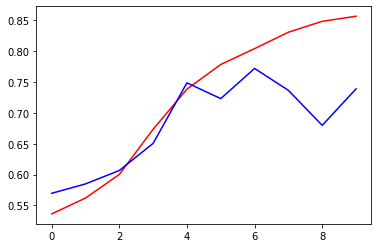

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.show()

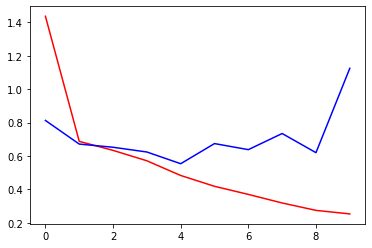

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.show()

In [33]:
import cv2
test_img = cv2.imread('/content/dog.jpg')

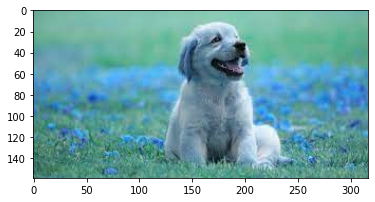

In [34]:
plt.imshow(test_img)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
model.predict(test_input)

1/1 [==============================] - 0s 247ms/step


array([[0.]], dtype=float32)